# Neuroscience Data Analysis with Python Workshop – MiniProject #1


#### Moriah Goldsmith, 215769241
git link: 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

try: 
  #load the data
  data_laptops = pd.read_csv("laptop_price - dataset.csv")
  
except FileNotFoundError:
  print("Error: The CSV file was not found. Please check the path.")


#### Plot the price of all the laptops


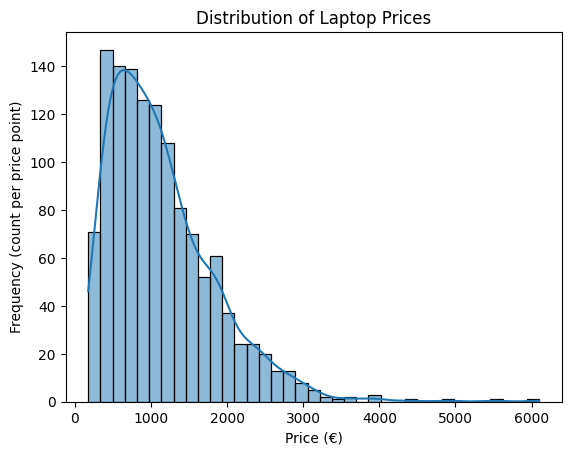

In [ ]:
sns.histplot(data_laptops["Price (Euro)"],  kde= True)
plt.xlabel('Price (€)')
plt.ylabel('Frequency (count per price point)')
plt.title('Distribution of Laptop Prices')
plt.show()

#### Average most expensive laptop

The company with the average most expensive laptop is "Razer" with approximtly 3346.14 €  
Average laptop price for each company:
Company
Razer        3346.14
LG           2099.00
MSI          1728.91
Google       1677.67
Microsoft    1612.31
Apple        1564.20
Huawei       1424.00
Samsung      1413.44
Toshiba      1267.81
Dell         1199.23
Xiaomi       1133.46
Asus         1123.83
Lenovo       1093.86
HP           1080.31
Fujitsu       729.00
Acer          633.46
Chuwi         314.30
Mediacom      295.00
Vero          217.42
Name: Price (Euro), dtype: float64


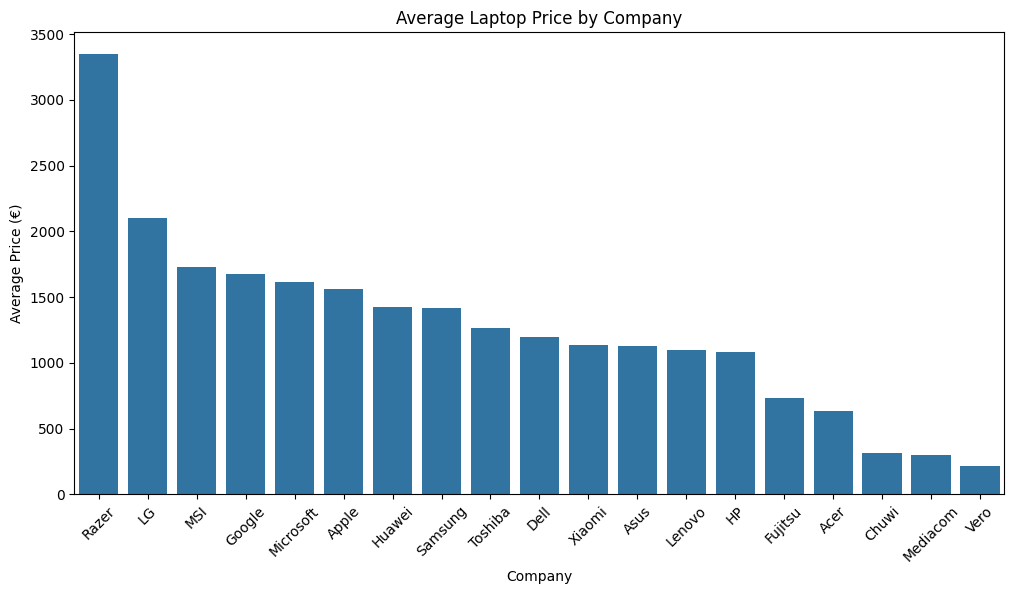

In [13]:
#sorting and calculating mean
avg_price = data_laptops.groupby("Company")["Price (Euro)"].mean().sort_values(ascending= False)

#find company with average most expensive laptop
highest_company = avg_price.idxmax() #company name with highest mean price.
highest_mean_price = avg_price.max() #highest mean price.
print(f'The company with the average most expensive laptop is "{highest_company}" with approximtly {(highest_mean_price).round(2)} €  ')

# printiong average laptop price
print('Average laptop price for each company:')
print(avg_price.round(2))

#plot of average laptop price
plt.figure(figsize=(12,6))
sns.barplot(x= avg_price.index, y= avg_price.values)
plt.xticks(rotation=45) #to avoid overlap
plt.ylabel('Average Price (€)')
plt.title("Average Laptop Price by Company")
plt.show()

#### Different types of Operating systems in the data.


In [ ]:

unique_ops_list = list( data_laptops['OpSys'].unique()) #list of OpS
print(unique_ops_list)  #understanding the duplications manually

#mapping the changes.
mapping_change = {
      'Mac OS X': 'MacOS', 
      'Windows 10 S': 'Windows 10', 
      'macOS': 'MacOS'
}

#uniforming the opearating system.
data_laptops["OpSys"] = data_laptops["OpSys"].replace(mapping_change)


print(f'\nUpdated OpS distribution: \n{data_laptops["OpSys"].value_counts()}')


['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android', 'Windows 10 S', 'Chrome OS', 'Windows 7']

Updated OpS distribution: 
OpSys
Windows 10    1056
No OS           66
Linux           58
Windows 7       45
Chrome OS       27
MacOS           21
Android          2
Name: count, dtype: int64


#### Plot of price distribution for each of the operating system types.


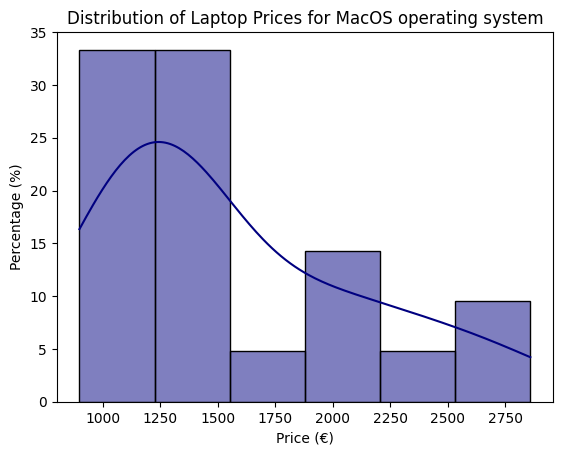

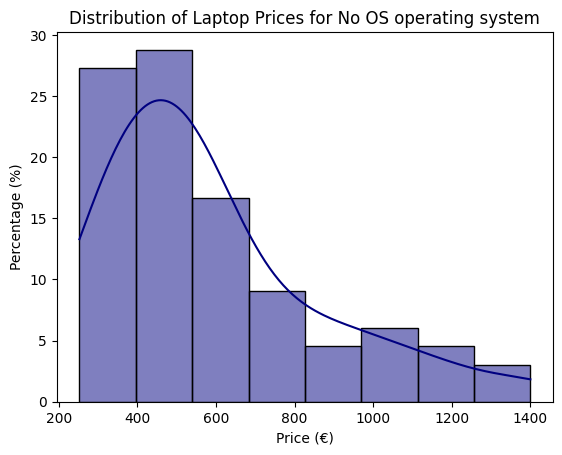

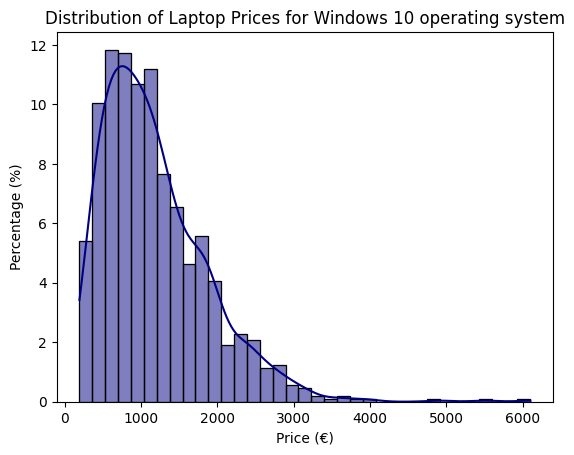

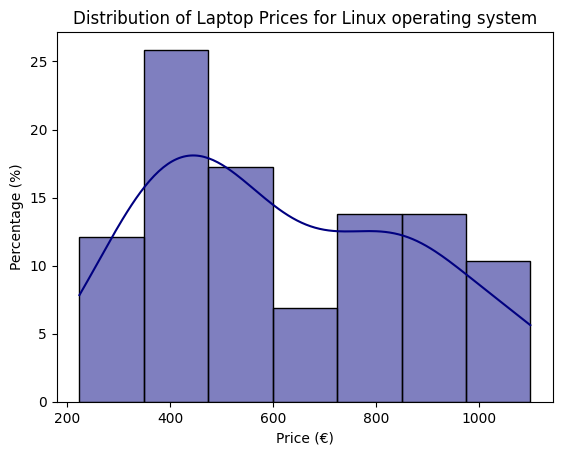

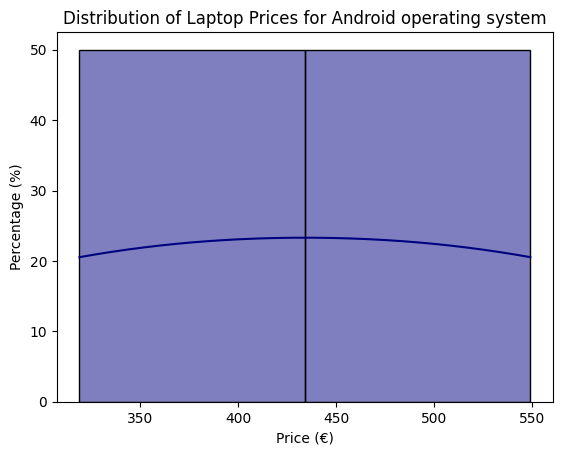

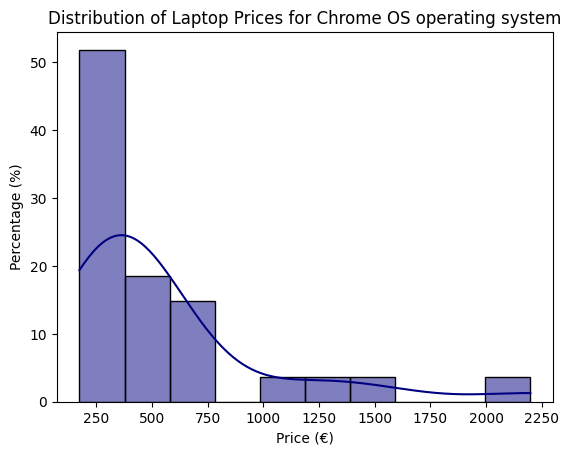

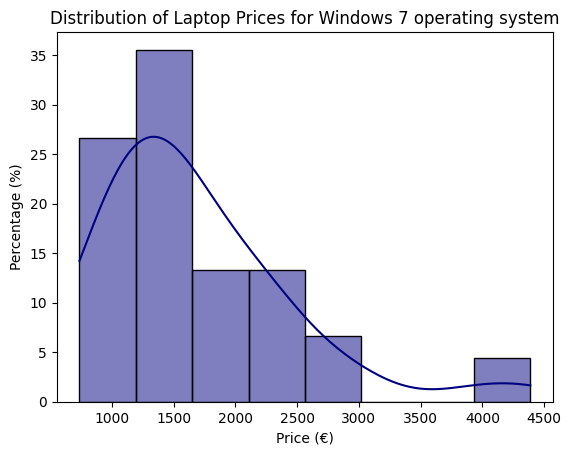

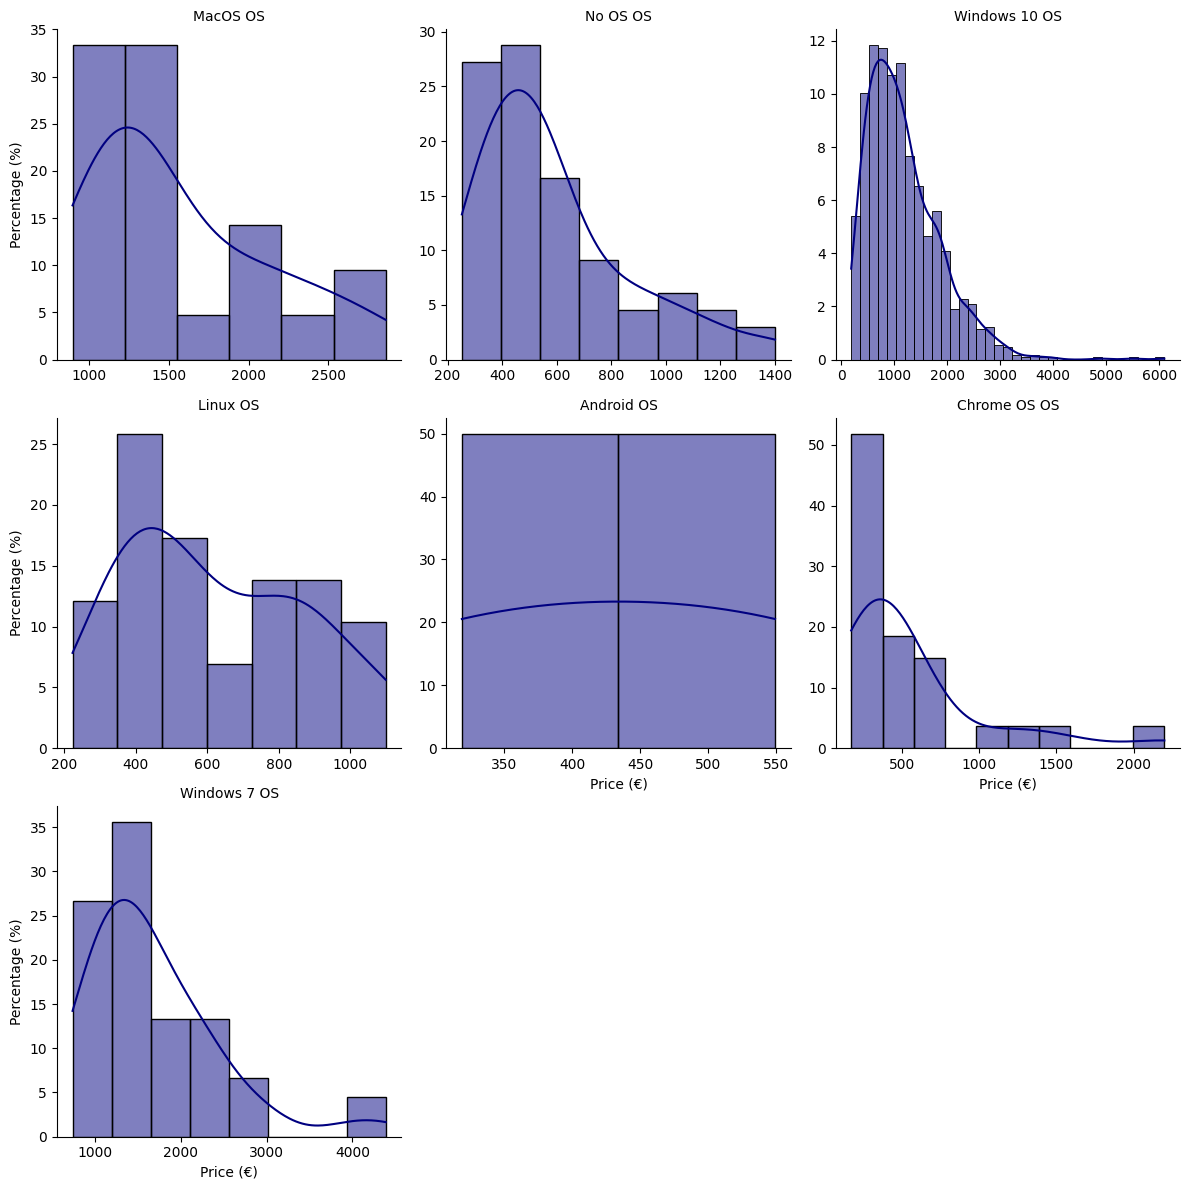

In [ ]:

unique_ops = list(data_laptops['OpSys'].unique()) #list of operating systems. 

#plot maker function
def plot_OpS(df , OpS):
  df_sort = df[df['OpSys'] == OpS] #leave only the rows that have this particular OpS.
  sns.histplot(df_sort["Price (Euro)"], kde= True, stat= 'percent', color= 'navy')
  plt.xlabel('Price (€)')
  plt.ylabel('Percentage (%)')
  plt.title(f'Distribution of Laptop Prices for {OpS} operating system')
  plt.show()
  return None

#loop for all OpS
for Ops in unique_ops:
  plot_OpS(data_laptops, Ops)
  

# another option is to plot all at once,for better comparison
g = sns.FacetGrid(data_laptops, col="OpSys", col_wrap=3, sharex=False,  sharey=False, height=4)
g.map(sns.histplot, "Price (Euro)", kde=True, color="navy", stat="percent")

#adding titles
g.set_axis_labels("Price (€)", "Percentage (%)")
g.set_titles("{col_name} OS")
plt.tight_layout()
plt.show()



#### The relationship between RAM and computer price


Outlier is a value that deviates significantly from the distribution of the rest of the data within its group.
to detect it We use the Interquartile Range (IQR) method. 
Any value that falls below $Q1 - 1.5 \times IQR$ or above $Q3 + 1.5 \times IQR$ 
is defined as an outlier and is typically represented as a point outside the 'whiskers' of a Boxplot.

##### In this case, I defiend outliers per RAM value.


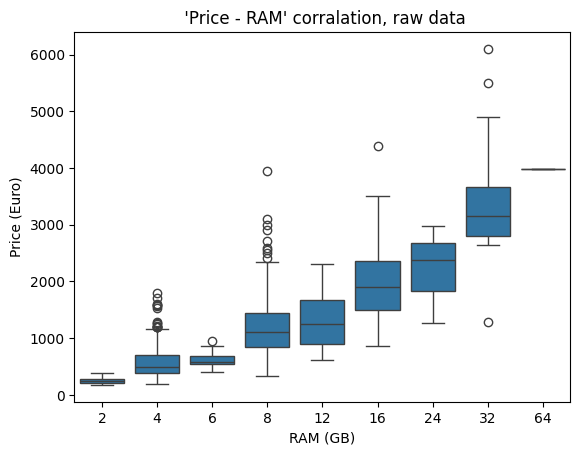

sum of 'Price (Euro)' outliers per 'RAM (GB)' value: 29
percentege: 2.2745098039215685%


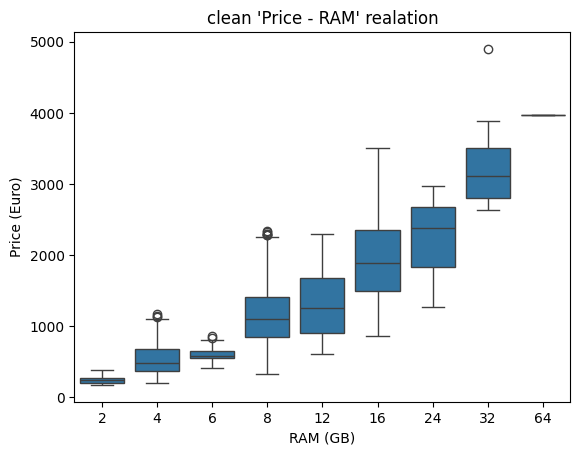

spearman correlation 0.7642484695916761 with p value of 9.301364561730556e-245 
This indicites with a statisticly significant propability that as the RAM gets larger the price get greater as well.


In [16]:

#show current distirbution
sns.boxplot(x= 'RAM (GB)', y= 'Price (Euro)', data= data_laptops)
plt.title(" 'Price - RAM' corralation, raw data")
plt.show()

#find the price outliers for each RAM box.
def get_group_outliers(df, group_column, value_column):

    #inner function for calculation of outliers in a single series
    def check_outliers(series):
      
      #using IQR (Interquartile Range).
      q1 = series.quantile(0.25)
      q3 = series.quantile(0.75)
      IQR = q3 - q1

  
      lower_bound = q1 - 1.5 * IQR
      upper_bound = q3 + 1.5 * IQR

      # Filter out the outliers, for values out of boundries- returns True.

      return (series < lower_bound) | (series > upper_bound)
    
    # applying that function on different RAM values
    is_outlier = df.groupby(group_column)[value_column].transform(check_outliers) #returns a series of boolian values.
    outliers_df = df[is_outlier]
    clean_df = df[~is_outlier] #converts True to False and vice versa

    print(f"sum of '{value_column}' outliers per '{group_column}' value: {sum(is_outlier)}")
    print(f"percentege: {(sum(is_outlier)/len(df)) * 100 }%")
          
    return outliers_df, clean_df  #returns 2 df: only outliers and clean data.


   
outliers , clean_data = get_group_outliers(data_laptops, 'RAM (GB)', 'Price (Euro)') #apply the functions on RAM & Price

#ploting the claen data
sns.boxplot(x= 'RAM (GB)', y= 'Price (Euro)', data= clean_data)
plt.title("clean 'Price - RAM' realation")
plt.show()

#useing spearman corrolation because RAM isn't continuous.
rho , p_value = stats.spearmanr(data_laptops['RAM (GB)'], data_laptops['Price (Euro)'])
print(f'spearman correlation {rho} with p value of {p_value} \nThis indicites with a statisticly significant propability that as the RAM gets larger the price get greater as well.')





#### Creating a new column called "Storage type" that extracts the storage type from the column "Memory".


In [17]:
def add_column(df, column):
    df_list = df[column].str.split().str[1] #extract the first word form the column
    df["Storage type"] = df_list #add as a new column to df 
    return df

#apply the function on the data
new_data = add_column(data_laptops, "Memory")